## From Excel to Python

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
file = "data/ecommerce.csv"
df = pd.read_csv(file, decimal=',')

### Approaching Your Dataset for the First Time

Explore your dataset quickly using Pandas, before you start your analysis
- Checking how your dataset looks like
- Finding out quickly how many columns and rows
- What are all the column names
- What data type does each column have
- etc

In [2]:
# What data do you have? Print your dataframe
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,"12,680.00",France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.1,"12,680.00",France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,"12,680.00",France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,"12,680.00",France


In [3]:
# total number of columns & rows in short
df.shape

(541909, 8)

In [4]:
# All the column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# What data type do the columns have?
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice       object
CustomerID     float64
Country         object
dtype: object

In [6]:
# describe() is used to generate descriptive statistics of the data in a Pandas DataFrame or Series. 
# It summarizes central tendency and dispersion of the dataset. 
# describe() helps in getting a quick overview of the dataset. 
df.describe()

,Quantity,CustomerID
count,"541,909.00","406,829.00"
mean,9.55,"15,287.69"
std,218.08,"1,713.60"
min,"-80,995.00","12,346.00"
25%,1.00,"13,953.00"
50%,3.00,"15,152.00"
75%,10.00,"16,791.00"
max,"80,995.00","18,287.00"


From the quick statistic overview above, does everything make sense?
Should we explore a few things that bother us about the data 👆?

In [7]:
# Let's sort the values by Quantity
df.sort_values(by="Quantity", ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,"16,446.00",United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,"12,346.00",United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0,"13,256.00",United Kingdom
74614,542504,37413,NaN,5568,1/28/2011 12:03,0,nan,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,"12,901.00",United Kingdom
...,...,...,...,...,...,...,...,...
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,"15,838.00",United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0,nan,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0,nan,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,"12,346.00",United Kingdom


In [8]:
# df["Country"].drop_duplicates().sort_values()
# df[["InvoiceNo", "Quantity", "UnitPrice"]]
# df[["StockCode", "Description"]].drop_duplicates().sort_values(by="Description")
# df[df["Description"].isna()]
df.filter(items=['StockCode', 'Description'])

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS
541905,22899,CHILDREN'S APRON DOLLY GIRL
541906,23254,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE


In [29]:
# filter rows & columns with #loc
# df.loc[row(s), column(s)]
df[0:3]
df.loc[0:3, ['Description', 'StockCode']]
not_refund = df['Quantity'] > 0
df.loc[not_refund, ['Quantity', 'UnitPrice']]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,"17,850.00",United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,"17,850.00",United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,"17,850.00",United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,"17,850.00",United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,"13,047.00",United Kingdom


### Cleaning and Manipulating Data

Unit price seems like something that should be numeric

Let's convert the data type of unit price to float, so we can do some calculation with it 🤔

While, CustomerID can be converted to a non-numerical type, because we don't need to do any calculation with it 

👇👇👇

In [9]:
# unit price seems like something that should be numeric, let's convert the data type of unit price to float
df['UnitPrice'] = df['UnitPrice'].astype('float')
df['CustomerID'] = df['CustomerID'].astype('object')
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [10]:
df.describe()

,Quantity,UnitPrice
count,"541,909.00","541,909.00"
mean,9.55,4.61
std,218.08,96.76
min,"-80,995.00","-11,062.06"
25%,1.00,1.25
50%,3.00,2.08
75%,10.00,4.13
max,"80,995.00","38,970.00"


In [11]:
df.sort_values(by="UnitPrice", ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,"-11,062.06",NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,"-11,062.06",NaN,United Kingdom
40984,539750,22652,TRAVEL SEWING KIT,1,12/21/2010 15:40,0.00,NaN,United Kingdom
52217,540696,84562A,NaN,1,1/11/2011 9:14,0.00,NaN,United Kingdom
52262,540699,POST,NaN,1000,1/11/2011 9:32,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,"13,541.33",NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,"16,453.71",NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,"16,888.02",NaN,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,"17,836.46",NaN,United Kingdom


In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [13]:
df_sales_only = (df['Quantity'] >= 0) & (df['UnitPrice'] >= 0) & (df['CustomerID'].notna())
sales = df[df_sales_only]
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,"12,680.00",France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,"12,680.00",France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,"12,680.00",France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,"12,680.00",France


In [14]:
sales.describe()

,Quantity,UnitPrice
count,"397,924.00","397,924.00"
mean,13.02,3.12
std,180.42,22.10
min,1.00,0.00
25%,2.00,1.25
50%,6.00,1.95
75%,12.00,3.75
max,"80,995.00","8,142.75"


In [15]:
sales.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,"12,680.00",France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,"12,680.00",France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,"12,680.00",France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,"12,680.00",France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,"12,680.00",France


In [16]:
sales = sales.reset_index()



⭐️ Adding a new "calculated" column is super simple ⭐️

In [17]:
# Now that we have converted UnitPrice to numeric type, we can use it to calculate the invoice amount
amount = (sales['Quantity'] * sales['UnitPrice'])

In [18]:
sales['Amount'] = amount
sales

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,"12,680.00",France,10.20
397920,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,"12,680.00",France,12.60
397921,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,"12,680.00",France,16.60
397922,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,"12,680.00",France,16.60


In [19]:
sales.describe()

,index,Quantity,UnitPrice,Amount
count,"397,924.00","397,924.00","397,924.00","397,924.00"
mean,"278,465.22",13.02,3.12,22.39
std,"152,771.37",180.42,22.10,309.06
min,0.00,1.00,0.00,0.00
25%,"148,333.75",2.00,1.25,4.68
50%,"284,907.50",6.00,1.95,11.80
75%,"410,079.25",12.00,3.75,19.80
max,"541,908.00","80,995.00","8,142.75","168,469.60"


In [20]:
sales['Amount'].sum()

8911407.904

In [21]:
sales['Amount'].mean()

22.39474850474768

In [22]:
sales['Amount'].value_counts()

15.00       20082
17.70        9174
16.50        8490
10.20        8028
19.80        7625
            ...  
65.88           1
159.50          1
436.80          1
1,275.00        1
321.84          1
Name: Amount, Length: 2940, dtype: int64

In [23]:
sales['Amount'].value_counts().sort_index()

0.00          40
0.00           4
0.06           1
0.08           1
0.10           3
              ..
7,144.72       1
8,142.75       1
38,970.00      1
77,183.60      1
168,469.60     1
Name: Amount, Length: 2940, dtype: int64

In [24]:
sales['PurchaseType'] = np.where(sales['Amount'] > 70, 'High Value', 'Low Value')
sales

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,PurchaseType
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom,15.30,Low Value
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34,Low Value
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom,22.00,Low Value
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34,Low Value
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34,Low Value
...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,"12,680.00",France,10.20,Low Value
397920,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,"12,680.00",France,12.60,Low Value
397921,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,"12,680.00",France,16.60,Low Value
397922,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,"12,680.00",France,16.60,Low Value


In [25]:
# more advance IF with multiple conditions:
conditions = [
    (sales['Amount']>=120),
    (sales['Amount']>=50) & (sales['Amount']<120),
    (sales['Amount']<50),
]
values = ['High Value', 'Med Value', 'Low Value']

sales['PurchaseType2'] = np.select(conditions, values)
sales[sales['Amount'] >= 50]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,PurchaseType,PurchaseType2
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,"13,047.00",United Kingdom,54.08,Low Value,Med Value
26,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,"12,583.00",France,90.00,High Value,Med Value
27,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,"12,583.00",France,90.00,High Value,Med Value
33,33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,"12,583.00",France,53.10,Low Value,Med Value
34,34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-12-01 08:45:00,2.95,"12,583.00",France,70.80,High Value,Med Value
...,...,...,...,...,...,...,...,...,...,...,...,...
397881,541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,"13,777.00",United Kingdom,66.60,Low Value,Med Value
397882,541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,"13,777.00",United Kingdom,51.84,Low Value,Med Value
397883,541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2011-12-09 12:25:00,1.85,"13,777.00",United Kingdom,88.80,High Value,Med Value
397907,541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,"13,113.00",United Kingdom,214.80,High Value,High Value


In [26]:
sales['PurchaseType2'].value_counts()

Low Value     370691
Med Value      17987
High Value      9246
Name: PurchaseType2, dtype: int64

In [27]:
import datetime as dt
sales['Description'] = sales['Description'].str.title()
sales['Year'] = sales['InvoiceDate'].dt.year
sales['Year & Invoice'] = sales['Year'].astype('str').str.cat(sales['InvoiceNo'], sep=" | ")
sales

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,PurchaseType,PurchaseType2,Year,Year & Invoice
0,0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom,15.30,Low Value,Low Value,2010,2010 | 536365
1,1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34,Low Value,Low Value,2010,2010 | 536365
2,2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom,22.00,Low Value,Low Value,2010,2010 | 536365
3,3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34,Low Value,Low Value,2010,2010 | 536365
4,4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34,Low Value,Low Value,2010,2010 | 536365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,Pack Of 20 Spaceboy Napkins,12,2011-12-09 12:50:00,0.85,"12,680.00",France,10.20,Low Value,Low Value,2011,2011 | 581587
397920,541905,581587,22899,Children'S Apron Dolly Girl,6,2011-12-09 12:50:00,2.10,"12,680.00",France,12.60,Low Value,Low Value,2011,2011 | 581587
397921,541906,581587,23254,Childrens Cutlery Dolly Girl,4,2011-12-09 12:50:00,4.15,"12,680.00",France,16.60,Low Value,Low Value,2011,2011 | 581587
397922,541907,581587,23255,Childrens Cutlery Circus Parade,4,2011-12-09 12:50:00,4.15,"12,680.00",France,16.60,Low Value,Low Value,2011,2011 | 581587


In [28]:
sales.dtypes

index                      int64
InvoiceNo                 object
StockCode                 object
Description               object
Quantity                   int64
InvoiceDate       datetime64[ns]
UnitPrice                float64
CustomerID                object
Country                   object
Amount                   float64
PurchaseType              object
PurchaseType2             object
Year                       int64
Year & Invoice            object
dtype: object

### Analyze Data

### Pivot Table like in Excel 💪
- With pd.pivot_table()
- pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)
                    
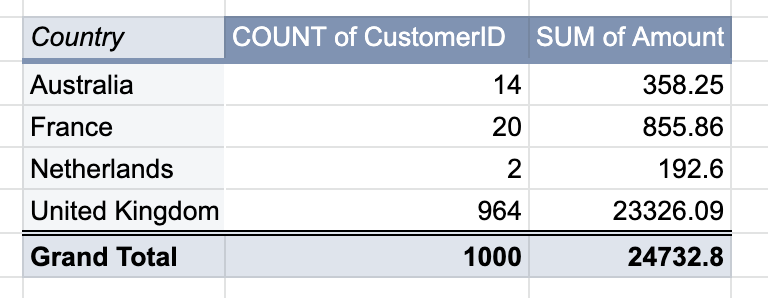

In [29]:
sales_pvt = pd.pivot_table(sales, index=["Country"], 
               values=['Amount', 'Quantity'], 
               aggfunc={"Amount": np.sum, "Quantity": np.mean}).sort_values('Amount', ascending=False)
sales_pvt = sales_pvt.reset_index()
sales_pvt

,Country,Amount,Quantity
0,United Kingdom,"7,308,391.55",12.05
1,Netherlands,"285,446.34",85.03
2,EIRE,"265,545.90",19.41
3,Germany,"228,867.14",13.19
4,France,"209,024.05",13.36
5,Australia,"138,521.31",71.06
6,Spain,"61,577.11",11.25
7,Switzerland,"56,443.95",16.33
8,Belgium,"41,196.34",11.44
9,Sweden,"38,378.33",80.01


In [30]:
#sales_pvt = pd.pivot_table(sales, values="Amount", index="Country", aggfunc=[np.sum, np.mean]) #.droplevel(level=1)
#sales_pvt.sort_values(by=('sum', 'Amount'), ascending=False) 
#sales_pvt = sales_pvt.columns.droplevel(level=1)
#sales_pvt # .reset_index().droplevel(level=0)

### Data Visualization


#### Basic Charts & Graphs with matplotlib library

In [41]:
import matplotlib. pyplot as plt
%matplotlib inline 
# to show the plot after the code

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [42]:
sales['Month'] = sales['Year'].astype('str') +  sales['InvoiceDate'].dt.month.astype('int').map('{:02d}'.format)
#sales

In [43]:
avg_purchase = sales.pivot_table(index="Month", 
                                 values=["Quantity", "Amount"], aggfunc={'Quantity': np.sum, 'Amount': np.sum})
avg_purchase = avg_purchase.sort_values(by="Month", ascending=True) #.head(10) #.set_index("Country")
avg_purchase = avg_purchase.reset_index()

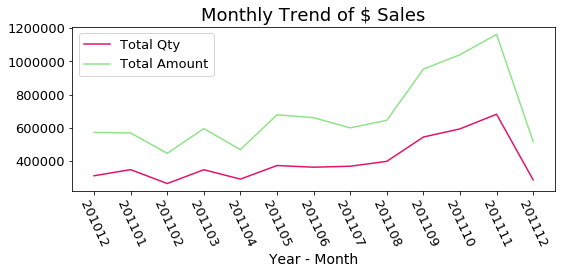

In [48]:
plt.figure(figsize=(8,4), tight_layout=True)
# plt.box(False)

plt.plot(avg_purchase['Month'], avg_purchase['Quantity'], color="#E1146D", label="Total Qty")
plt.plot(avg_purchase['Month'], avg_purchase['Amount'], color="#8FE388", label="Total Amount")
plt.xticks(rotation=295)
plt.title('Monthly Trend of $ Sales')
plt.xlabel('Year - Month')
#plt.ylabel('Amount $')
plt.legend()
plt.show()

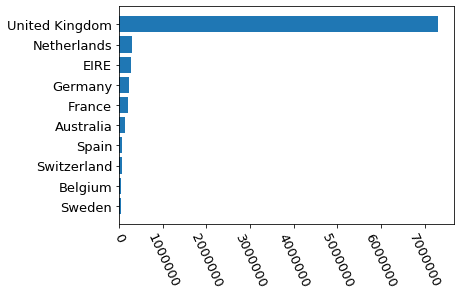

In [49]:
top_10 = sales_pvt.head(10).sort_values(by="Amount")
plt.barh(top_10['Country'], top_10['Amount'])
plt.xticks(rotation=295)
plt.show()